In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [3]:
print('CIFAR10 vs SVHN OOD Detection Task')
path_in = '../outputs/confidence_IN.txt'
path_out = '../outputs/confidence_OUT.txt'
id = np.loadtxt(path_in, delimiter='\n')
ood = np.loadtxt(path_out, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood), np.median(ood), len(ood)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id), np.median(id), len(id)))

CIFAR10 vs SVHN OOD Detection Task
Mean confidence OOD: 0.7844831622672195, Median: 0.8376538753509521, Length: 26032
Mean confidence ID: 0.9816196332097054, Median: 0.9999608993530273, Length: 10000


In [4]:
total_len = len(ood)+len(id)
for t in np.linspace(0.0,1.0,10):
    # print('Threshold: {}'.format(t))
    # our ID data is a positive class! 
    tp_ood = np.zeros(len(ood))
    fp_ood = np.zeros(len(ood))
    tp_id = np.zeros(len(id))
    fp_id = np.zeros(len(id))
    tp_ood[ood <= t] = 1
    tp_id[id > t] = 1 
    fp_ood[ood > t] = 1
    fp_id[id <= t] = 1
    tp_total = int(np.sum(tp_ood) + np.sum(tp_id))
    fp_total = int(np.sum(fp_ood) + np.sum(fp_id))
    print('For t={}, we have {} false positives and {} true positives.'.format(t, fp_total, tp_total))

For t=0.0, we have 26032 false positives and 10000 true positives.
For t=0.1111111111111111, we have 26032 false positives and 10000 true positives.
For t=0.2222222222222222, we have 26030 false positives and 10002 true positives.
For t=0.3333333333333333, we have 25827 false positives and 10205 true positives.
For t=0.4444444444444444, we have 24494 false positives and 11538 true positives.
For t=0.5555555555555556, we have 21604 false positives and 14428 true positives.
For t=0.6666666666666666, we have 18593 false positives and 17439 true positives.
For t=0.7777777777777777, we have 15318 false positives and 20714 true positives.
For t=0.8888888888888888, we have 11509 false positives and 24523 true positives.
For t=1.0, we have 10000 false positives and 26032 true positives.


In [5]:
id_l = np.ones(len(id))
ood_l = np.zeros(len(ood))
true_labels = np.concatenate((id_l, ood_l))
pred_probs = np.concatenate((id, ood))
assert(len(true_labels) == len(pred_probs))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = pred_probs, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)

AUROC: 0.9371417409342346, Datapoints for curve: 5404


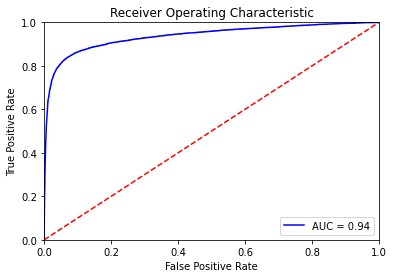

In [6]:
print('AUROC: {}, Datapoints for curve: {}'.format(auroc, len(fpr)))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
# AUCPR
print(pred_probs.shape, true_labels.shape)
precision, recall, _ = sklearn.metrics.precision_recall_curve(true_labels, pred_probs)
aucpr = sklearn.metrics.auc(recall, precision)

(36032,) (36032,)


AUCPR: 0.8992173708598431, Datapoints for curve: 5404


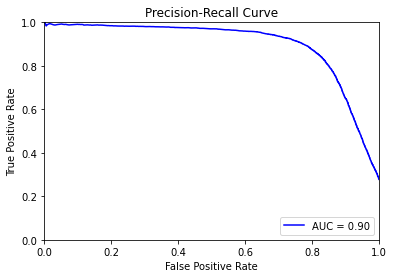

In [11]:
print('AUCPR: {}, Datapoints for curve: {}'.format(aucpr, len(fpr)))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % aucpr)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
# Deep Ensemble Evaluation
print('CIFAR10 vs SVHN OOD Detection Task')
path_in = '../outputs/confidence_IN_MCP-2.txt'
path_out = '../outputs/confidence_OUT_MCP-2.txt'
path_in1 = '../outputs/confidence_IN_MCP-4.txt'
path_out1 = '../outputs/confidence_OUT_MCP-4.txt'
path_in2 = '../outputs/confidence_IN_MCP-5.txt'
path_out2 = '../outputs/confidence_OUT_MCP-5.txt'
path_in3 = '../outputs/confidence_IN_MCP-8.txt'
path_out3 = '../outputs/confidence_OUT_MCP-8.txt'
path_in4 = '../outputs/confidence_IN_MCP-9.txt'
path_out4 = '../outputs/confidence_OUT_MCP-9.txt'
id0 = np.loadtxt(path_in, delimiter='\n')
ood0 = np.loadtxt(path_out, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood0), np.median(ood0), len(ood0)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id0), np.median(id0), len(id0)))
id1 = np.loadtxt(path_in1, delimiter='\n')
ood1 = np.loadtxt(path_out1, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood1), np.median(ood1), len(ood1)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id1), np.median(id1), len(id1)))
id2 = np.loadtxt(path_in2, delimiter='\n')
ood2 = np.loadtxt(path_out2, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood2), np.median(ood2), len(ood2)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id2), np.median(id2), len(id2)))

id3 = np.loadtxt(path_in3, delimiter='\n')
ood3 = np.loadtxt(path_out3, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood3), np.median(ood3), len(ood3)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id3), np.median(id3), len(id3)))

id4 = np.loadtxt(path_in4, delimiter='\n')
ood4 = np.loadtxt(path_out4, delimiter='\n')
print('Mean confidence OOD: {}, Median: {}, Length: {}'.format(np.mean(ood4), np.median(ood4), len(ood4)))
print('Mean confidence ID: {}, Median: {}, Length: {}'.format(np.mean(id4), np.median(id4), len(id4)))

CIFAR10 vs SVHN OOD Detection Task
Mean confidence OOD: 0.8195591455585362, Median: 0.8888030350208282, Length: 26032
Mean confidence ID: 0.9785168354749679, Median: 0.999964714050293, Length: 10000
Mean confidence OOD: 0.7806075971422474, Median: 0.8216643929481506, Length: 26032
Mean confidence ID: 0.9791929050862789, Median: 0.9999762773513794, Length: 10000
Mean confidence OOD: 0.8252698857035, Median: 0.8938691020011902, Length: 26032
Mean confidence ID: 0.9798928335130215, Median: 0.9999537467956543, Length: 10000
Mean confidence OOD: 0.8205667432871565, Median: 0.8821613788604736, Length: 26032
Mean confidence ID: 0.9817644035711884, Median: 0.9999887943267822, Length: 10000
Mean confidence OOD: 0.8732414618569535, Median: 0.9662916660308838, Length: 26032
Mean confidence ID: 0.9790724316179752, Median: 0.9999375343322754, Length: 10000


In [37]:
# combine all three predictions into one using the mean 
id_l = np.ones(len(id0))
ood_l = np.zeros(len(ood0))
true_labels = np.concatenate((id_l, ood_l))
pred_probs = np.concatenate((id0, ood0))
assert(len(true_labels) == len(pred_probs))

In [49]:
preds = np.zeros((len(pred_probs), 5))
preds[:,0] = pred_probs

id_l = np.ones(len(id1))
ood_l = np.zeros(len(ood1))
pred_probs = np.concatenate((id1, ood1))
preds[:,1] = pred_probs

id_l = np.ones(len(id2))
ood_l = np.zeros(len(ood2))
pred_probs = np.concatenate((id2, ood2))
preds[:,2] = pred_probs

id_l = np.ones(len(id3))
ood_l = np.zeros(len(ood3))
pred_probs = np.concatenate((id3, ood3))
preds[:,3] = pred_probs

id_l = np.ones(len(id4))
ood_l = np.zeros(len(ood4))
pred_probs = np.concatenate((id4, ood4))
preds[:,4] = pred_probs

m = np.mean(preds, axis=1)
std = np.std(preds, axis=1)
med = np.median(preds, axis=1)
min_probs = np.min(preds, axis=1)
max_prob = np.max(preds, axis=1)

In [50]:
m.shape

(36032,)

In [51]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = m, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)

AUROC: 0.9395495198217577, Datapoints for curve: 5474


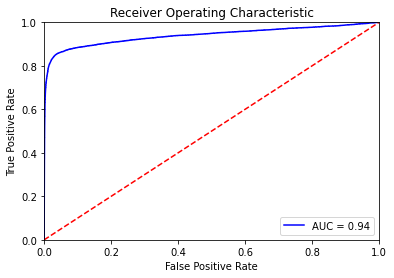

In [52]:
print('AUROC: {}, Datapoints for curve: {}'.format(auroc, len(fpr)))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = std, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)

(36032,) (36032,)
AUCPR: 0.9312474587679704, Datapoints for curve: 3975


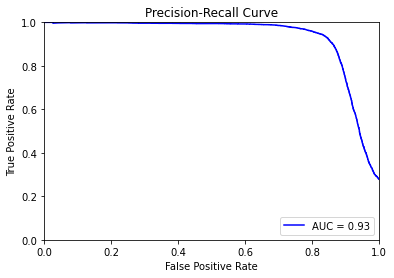

In [46]:

print(pred_probs.shape, m.shape)
precision, recall, _ = sklearn.metrics.precision_recall_curve(true_labels, m)
aucpr = sklearn.metrics.auc(recall, precision)
print('AUCPR: {}, Datapoints for curve: {}'.format(aucpr, len(fpr)))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % aucpr)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = med, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
print(auroc)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = min_probs, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
print(auroc)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true = true_labels, y_score = max_prob, pos_label = 1) #positive class is 1; negative class is 0
auroc = sklearn.metrics.auc(fpr, tpr)
print(auroc)

0.9370687672864167
0.9404683447295636
0.9191181641825446
